## GNCIPL Internship Week - 1 Project

### Submitted By: Sahil Adlakha

Project Title: Olmpic Medal Count by Country

Domain: Sports

Description: Compare country-wise medal performance across Olympic years.

Sample Analysis Goal: Barplots by Year, Sports-wise dominance, Medals won by Top Countries

Dataset: Olympics (1896-2024).csv (from Kaggle)


In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv("Olympics (1896-2024).csv")

# Inspect the Data
print(df.info())
print(df.head())

# Data Cleaning
# Ensure medal counts are numeric
medal_cols = ['Gold', 'Silver', 'Bronze', 'Total']
df[medal_cols] = df[medal_cols].apply(pd.to_numeric, errors='coerce')

# Remove any rows with missing years or totals (just in case)
df.dropna(subset=['Year', 'Total'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1436 non-null   int64 
 1   Rank    1436 non-null   object
 2   NOC     1436 non-null   object
 3   Gold    1436 non-null   int64 
 4   Silver  1436 non-null   int64 
 5   Bronze  1436 non-null   int64 
 6   Total   1436 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.7+ KB
None
   Year Rank            NOC  Gold  Silver  Bronze  Total
0  2024    1  United States    40      44      42    126
1  2024    2          China    40      27      24     91
2  2024    3          Japan    20      12      13     45
3  2024    4      Australia    18      19      16     53
4  2024    5         France    16      26      22     64


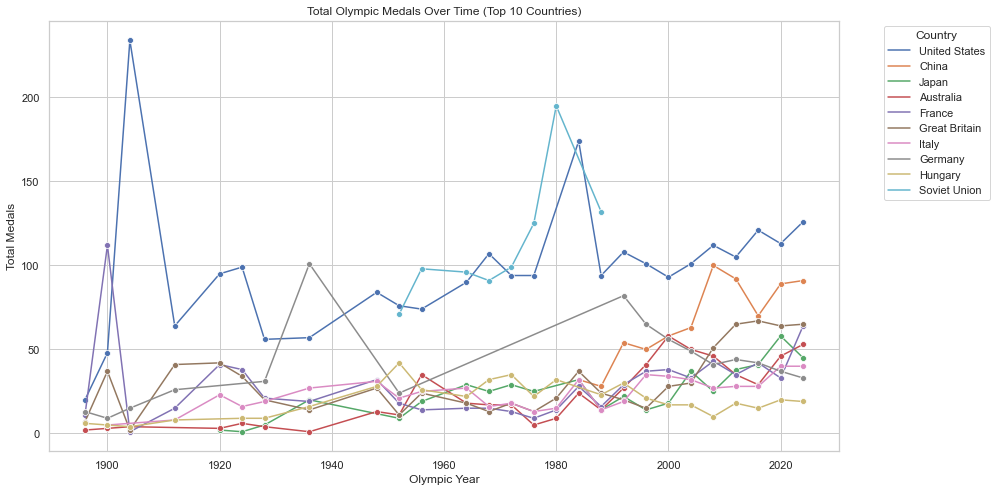

In [2]:
# Get Top 10 Countries by Total Medals Across All Years
top_countries = df.groupby('NOC')['Total'].sum().sort_values(ascending=False).head(10).index

# Filter data for top countries
df_top = df[df['NOC'].isin(top_countries)]

# Plot Total Medals Over Time for Top 10 Countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top, x='Year', y='Total', hue='NOC', marker='o')
plt.title('Total Olympic Medals Over Time (Top 10 Countries)')
plt.xlabel('Olympic Year')
plt.ylabel('Total Medals')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

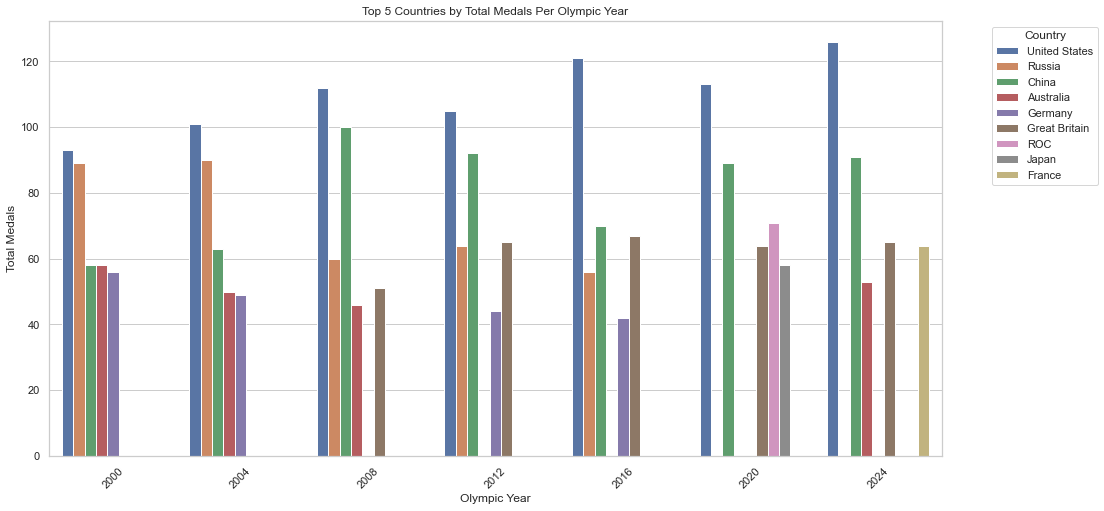

In [22]:
df['Year'] = df['Year'].astype(int)
# Top 5 Countries Per Year Based on Total Medals
top5_per_year = df.groupby('Year').apply(lambda x: x.sort_values('Total', ascending=False).head(5)).reset_index(drop=True)
top5_per_year = top5_per_year[(top5_per_year['Year'] >= 2000) & (top5_per_year['Year'] <= 2024)]

# Bar Plot: Top 5 Countries Per Year from 2000 t0 2024
plt.figure(figsize=(16, 8))
sns.barplot(data=top5_per_year, x='Year', y='Total', hue='NOC', dodge=True)
plt.title('Top 5 Countries by Total Medals Per Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Total Medals')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [16]:
print(top5_per_year.head(10))



   Year Rank            NOC  Gold  Silver  Bronze  Total
0  1896    2         Greece    10      18      19     47
1  1896    1  United States    11       7       2     20
2  1896    3        Germany     6       5       2     13
3  1896    4         France     5       4       2     11
4  1896    5  Great Britain     2       3       2      7
5  1900    1         France    31      41      40    112
6  1900    2  United States    20      13      15     48
7  1900    3  Great Britain    20       8       9     37
8  1900    4        Belgium     6       6       6     18
9  1900    5    Switzerland     6       3       1     10


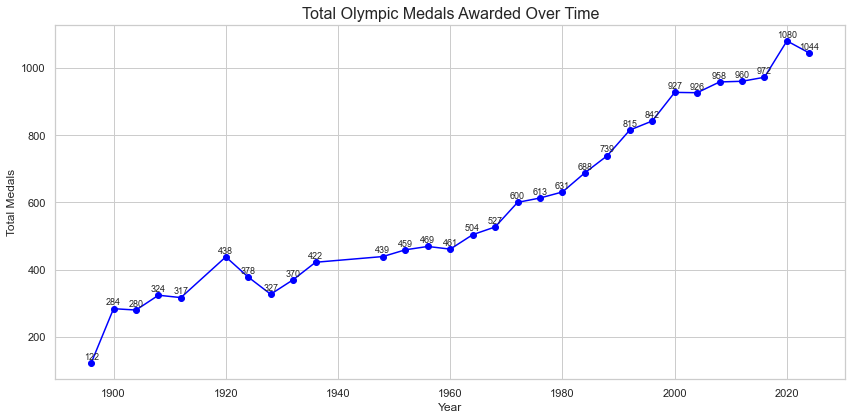

In [6]:
medals_over_time = df.groupby("Year")["Total"].sum()

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(medals_over_time.index, medals_over_time.values, marker='o', linestyle='-', color='blue')
plt.title("Total Olympic Medals Awarded Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)

# Add values on each point
for x, y in zip(medals_over_time.index, medals_over_time.values):
    plt.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

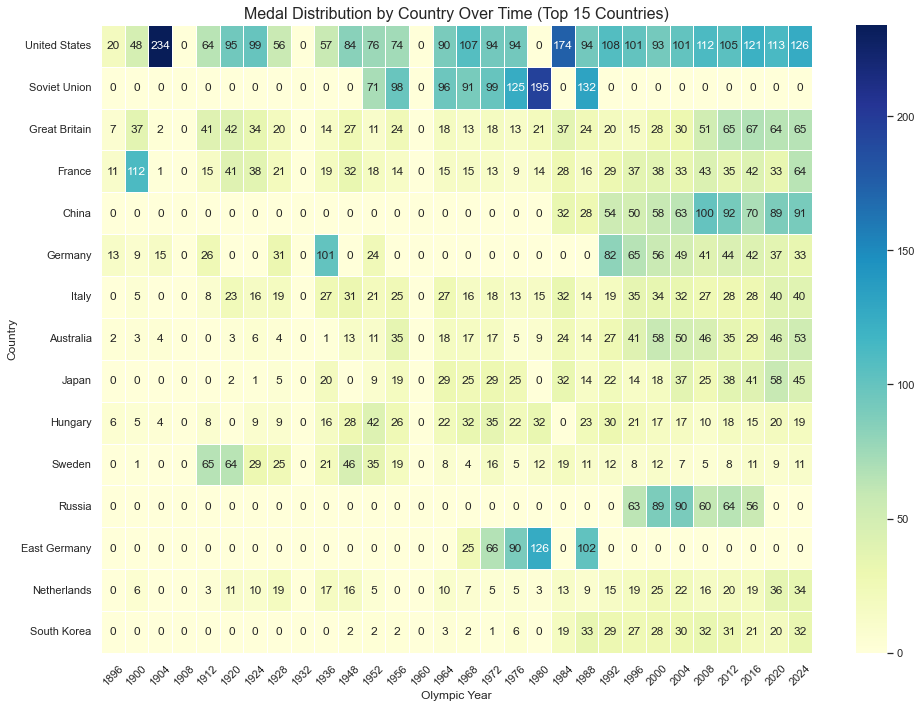

In [13]:
# Create pivot table: Countries (rows) vs Years (columns) with total medals
heatmap_data = df.pivot_table(index='NOC', columns='Year', values='Total', aggfunc='sum', fill_value=0)

# Sort countries by total medals and select Top 15
heatmap_data['Total'] = heatmap_data.sum(axis=1)
top20_heatmap = heatmap_data.sort_values(by='Total', ascending=False).drop(columns='Total').head(15)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top20_heatmap, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='d')
plt.title("Medal Distribution by Country Over Time (Top 15 Countries)", fontsize=16)
plt.xlabel("Olympic Year")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()